In [1]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
import sys
sys.path.append("../Handlers")
import traintest

In [2]:
spam_assassin = pd.read_csv("./SpamAssassin.csv")

In [3]:
subject = "Subject"
body = "Body"
spam_assassin_input = spam_assassin.apply(lambda x: f"{x[subject]} {x[body]}", axis=1)
spam_assassin_input

0       Re: New Sequences Window     Date:        Wed,...
1       [zzzzteana] RE: Alexander Martin A posted:\nTa...
2       [zzzzteana] Moscow bomber Man Threatens Explos...
3       [IRR] Klez: The Virus That  Won't Die Klez: Th...
4       Re: Insert signature On Wed Aug 21 2002 at 15:...
                              ...                        
4193    Preferred Non-Smoker Rates for Smokers  \t Pre...
4194    How to get 10,000 FREE hits per day to any web...
4195    Cannabis Difference ****Mid-Summer Customer Ap...
4196    [ILUG] WILSON  KAMELA ATTN:SIR/MADAN      \n\n...
4197    nan mv 00001.317e78fa8ee2f54cd4890fdc09ba8176 ...
Length: 4198, dtype: object

In [4]:
cnn = traintest.ConvolutionalNNClassifier("SpamAssassin")
cnn.load_data(spam_assassin_input, spam_assassin["Is_spam"])

['Re: New Sequences Window     Date:        Wed, 21 Aug 2002 10:54:46 -0500\n    From:        Chris Garrigues \n    Message-ID:  <1029945287.4797.TMDA@deepeddy.vircio.com>\n\n\n  | I can\'t reproduce this error.\n\nFor me it is very repeatable... (like every time, without fail).\n\nThis is the debug log of the pick happening ...\n\n18:19:03 Pick_It {exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace} {4852-4852 -sequence mercury}\n18:19:03 exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace 4852-4852 -sequence mercury\n18:19:04 Ftoc_PickMsgs {{1 hit}}\n18:19:04 Marking 1 hits\n18:19:04 tkerror: syntax error in expression "int ...\n\nNote, if I run the pick command by hand ...\n\ndelta$ pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace  4852-4852 -sequence mercury\n1 hit\n\nThat\'s where the "1 hit" comes from (obviously).  The version of nmh I\'m\nusing is ...\n\ndelta$ pick -version\npick -- nmh-1.0.4 [compiled on fuchsia.cs.mu.OZ.AU at Su

In [5]:
cnn.split(test_size=0.1, valid_size=0.1)
cnn.vectorizing()

Shape of the input data is (3358, 200)


<tf.Tensor: shape=(3358, 200), dtype=int64, numpy=
array([[1643, 3362,    1, ...,    0,    0,    0],
       [ 286,   16,  115, ..., 3852,    6,  919],
       [  81,    2,  304, ...,    0,    0,    0],
       ...,
       [ 930,  372,    1, ...,    0,    0,    0],
       [1116,    7,  478, ...,    0,    0,    0],
       [   2,  208,  127, ...,    7,  745, 3686]], dtype=int64)>

In [6]:
cnn.build(
    dense_dropout=True, 
    dense_dropout_rate=0.4, 
    epochs=20,
    conv_layer_num=2,
    num_filters=[128, 64],
    filter_sizes=[5, 3],
    max_pooling=True,
    pooling_sizes=[2, 0]
)

Epoch 1/20


e:\Python Tests\AI\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


105/105 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.7139 - loss: 0.5448 - precision: 0.7667 - recall: 0.1517 - val_accuracy: 0.9738 - val_loss: 0.1027 - val_precision: 0.9797 - val_recall: 0.9477
Epoch 2/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9727 - loss: 0.0777 - precision: 0.9527 - recall: 0.9630 - val_accuracy: 0.9619 - val_loss: 0.1175 - val_precision: 0.9858 - val_recall: 0.9085
Epoch 3/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9936 - loss: 0.0201 - precision: 0.9908 - recall: 0.9910 - val_accuracy: 0.9690 - val_loss: 0.1142 - val_precision: 0.9730 - val_recall: 0.9412
Epoch 4/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9987 - loss: 0.0066 - precision: 0.9980 - recall: 0.9982 - val_accuracy: 0.9690 - val_loss: 0.1090 - val_precision: 0.9605 - val_recall: 0.9542
Epoch 5/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9989 - loss: 0.0058 - precision: 0.9978 - recall: 0.9989 - val_accuracy: 0.9738 - val_loss: 0.1104 -

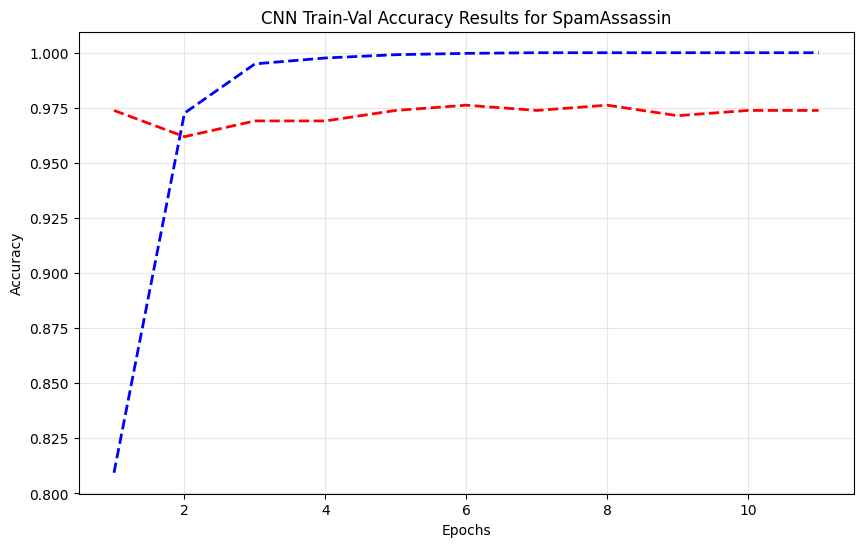

In [7]:
cnn.plot_training_validation_accuracy()

In [8]:
metrics = cnn.evaluate()
print(metrics)
del cnn

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
{'dataset': 'SpamAssassin', 'model': 'CNN', 'metrics': {'accuracy': 0.9785714285714285, 'weighted_precision': 0.9785613640091253, 'wighted_recall': 0.9785714285714285, 'weighted_f1': 0.9785093103253403, 'macro_precision': 0.9783164596597433, 'macro_recall': 0.9728018364241315, 'macro_f1': 0.9754862223490425, 'roc_auc': 0.9728018364241315}, 'confusion_matrix': array([[280,   3],
       [  6, 131]], dtype=int64), 'epochs': 11}


In [9]:
rnn = traintest.RecurrentNNClassifier("SpamAssassin")
rnn.load_data(spam_assassin_input, spam_assassin["Is_spam"])

['Re: New Sequences Window     Date:        Wed, 21 Aug 2002 10:54:46 -0500\n    From:        Chris Garrigues \n    Message-ID:  <1029945287.4797.TMDA@deepeddy.vircio.com>\n\n\n  | I can\'t reproduce this error.\n\nFor me it is very repeatable... (like every time, without fail).\n\nThis is the debug log of the pick happening ...\n\n18:19:03 Pick_It {exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace} {4852-4852 -sequence mercury}\n18:19:03 exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace 4852-4852 -sequence mercury\n18:19:04 Ftoc_PickMsgs {{1 hit}}\n18:19:04 Marking 1 hits\n18:19:04 tkerror: syntax error in expression "int ...\n\nNote, if I run the pick command by hand ...\n\ndelta$ pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace  4852-4852 -sequence mercury\n1 hit\n\nThat\'s where the "1 hit" comes from (obviously).  The version of nmh I\'m\nusing is ...\n\ndelta$ pick -version\npick -- nmh-1.0.4 [compiled on fuchsia.cs.mu.OZ.AU at Su

In [10]:
rnn.split(test_size=0.1, valid_size=0.1)
rnn.vectorizing()

Shape of the input data is (3358, 200)


<tf.Tensor: shape=(3358, 200), dtype=int64, numpy=
array([[1643, 3362,    1, ...,    0,    0,    0],
       [ 286,   16,  115, ..., 3852,    6,  919],
       [  81,    2,  304, ...,    0,    0,    0],
       ...,
       [ 930,  372,    1, ...,    0,    0,    0],
       [1116,    7,  478, ...,    0,    0,    0],
       [   2,  208,  127, ...,    7,  745, 3686]], dtype=int64)>

In [11]:
rnn.build(
    hidden_layer_num=2,
    hidden_sizes=[128, 64],
    epochs=20,
    lstm=False
)

Epoch 1/20


e:\Python Tests\AI\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


105/105 ━━━━━━━━━━━━━━━━━━━━ 50s 447ms/step - accuracy: 0.6763 - loss: 0.6479 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.6357 - val_loss: 0.6432 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 74s 702ms/step - accuracy: 0.6914 - loss: 0.6048 - precision: 0.6816 - recall: 0.1489 - val_accuracy: 0.6952 - val_loss: 0.6556 - val_precision: 1.0000 - val_recall: 0.1634
Epoch 3/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 70s 668ms/step - accuracy: 0.7354 - loss: 0.5389 - precision: 0.8294 - recall: 0.2692 - val_accuracy: 0.7167 - val_loss: 0.6257 - val_precision: 0.8542 - val_recall: 0.2680
Epoch 4/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 72s 685ms/step - accuracy: 0.8815 - loss: 0.3588 - precision: 0.9046 - recall: 0.7128 - val_accuracy: 0.9262 - val_loss: 0.2161 - val_precision: 0.9552 - val_recall: 0.8366
Epoch 5/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 72s 688ms/step - accuracy: 0.9704 - loss: 0.0955 - precision: 0.9797 - recall: 0.9315 - val_accuracy: 0

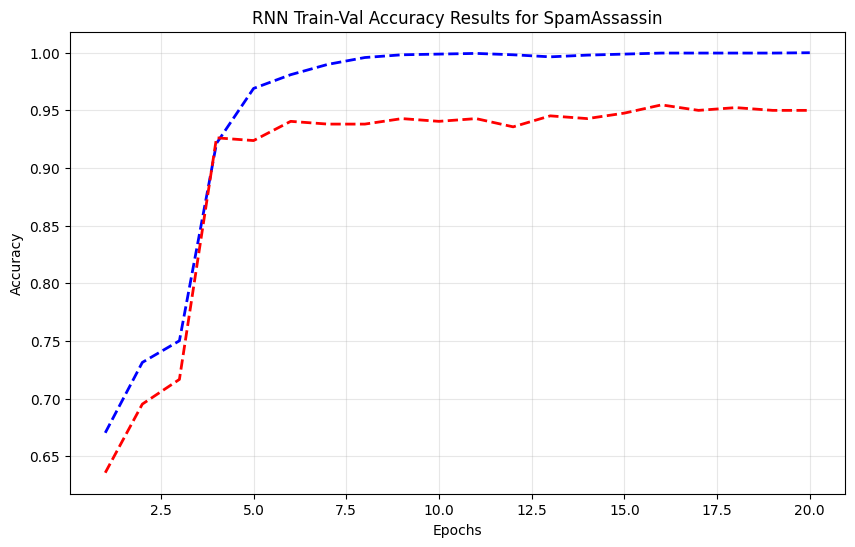

In [12]:
rnn.plot_training_validation_accuracy()

In [13]:
metrics = rnn.evaluate()
print(metrics)
del rnn

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step
{'dataset': 'SpamAssassin', 'model': 'RNN', 'metrics': {'accuracy': 0.9404761904761905, 'weighted_precision': 0.9402418845522293, 'wighted_recall': 0.9404761904761905, 'weighted_f1': 0.940059499298278, 'macro_precision': 0.9377984084880637, 'macro_recall': 0.925704779345387, 'macro_f1': 0.9313685118732474, 'roc_auc': 0.9257047793453871}, 'confusion_matrix': array([[274,   9],
       [ 16, 121]], dtype=int64), 'epochs': 20}


In [14]:
ann = traintest.ArtificialNNClassifier("SpamAssassin")
ann.load_data(spam_assassin_input, spam_assassin["Is_spam"])

['Re: New Sequences Window     Date:        Wed, 21 Aug 2002 10:54:46 -0500\n    From:        Chris Garrigues \n    Message-ID:  <1029945287.4797.TMDA@deepeddy.vircio.com>\n\n\n  | I can\'t reproduce this error.\n\nFor me it is very repeatable... (like every time, without fail).\n\nThis is the debug log of the pick happening ...\n\n18:19:03 Pick_It {exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace} {4852-4852 -sequence mercury}\n18:19:03 exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace 4852-4852 -sequence mercury\n18:19:04 Ftoc_PickMsgs {{1 hit}}\n18:19:04 Marking 1 hits\n18:19:04 tkerror: syntax error in expression "int ...\n\nNote, if I run the pick command by hand ...\n\ndelta$ pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace  4852-4852 -sequence mercury\n1 hit\n\nThat\'s where the "1 hit" comes from (obviously).  The version of nmh I\'m\nusing is ...\n\ndelta$ pick -version\npick -- nmh-1.0.4 [compiled on fuchsia.cs.mu.OZ.AU at Su

In [15]:
ann.split(test_size=0.1, valid_size=0.1)
ann.vectorizing()

Shape of the input data is (3358, 200)


<tf.Tensor: shape=(3358, 200), dtype=int64, numpy=
array([[1643, 3362,    1, ...,    0,    0,    0],
       [ 286,   16,  115, ..., 3852,    6,  919],
       [  81,    2,  304, ...,    0,    0,    0],
       ...,
       [ 930,  372,    1, ...,    0,    0,    0],
       [1116,    7,  478, ...,    0,    0,    0],
       [   2,  208,  127, ...,    7,  745, 3686]], dtype=int64)>

In [16]:
ann.build(
    hidden_layer_num=2,
    hidden_layer_sizes=[64, 64],
    epochs=20
)

Epoch 1/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6707 - loss: 0.5878 - precision: 0.5104 - recall: 0.1907 - val_accuracy: 0.9571 - val_loss: 0.1525 - val_precision: 0.9720 - val_recall: 0.9085
Epoch 2/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9538 - loss: 0.1268 - precision: 0.9382 - recall: 0.9203 - val_accuracy: 0.9810 - val_loss: 0.0655 - val_precision: 0.9866 - val_recall: 0.9608
Epoch 3/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9895 - loss: 0.0337 - precision: 0.9874 - recall: 0.9806 - val_accuracy: 0.9833 - val_loss: 0.0487 - val_precision: 0.9867 - val_recall: 0.9673
Epoch 4/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9979 - loss: 0.0134 - precision: 0.9972 - recall: 0.9963 - val_accuracy: 0.9857 - val_loss: 0.0411 - val_precision: 0.9868 - val_recall: 0.9739
Epoch 5/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0036 - precision: 1.0000 - recall: 0.9999 - val_accuracy: 0.9857 - val_los

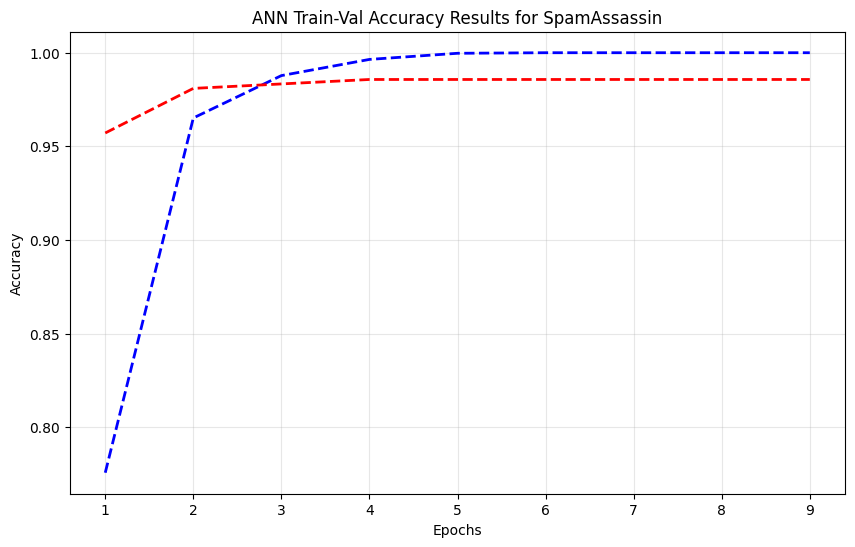

In [17]:
ann.plot_training_validation_accuracy()

In [19]:
metrics = ann.evaluate()
print(metrics)
del ann

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
{'dataset': 'SpamAssassin', 'model': 'ANN', 'metrics': {'accuracy': 0.9809523809523809, 'weighted_precision': 0.9810728336497044, 'wighted_recall': 0.9809523809523809, 'weighted_f1': 0.9809876216906743, 'macro_precision': 0.9766763101973936, 'macro_recall': 0.9802171726290269, 'macro_f1': 0.9784150477952513, 'roc_auc': 0.9802171726290267}, 'confusion_matrix': array([[278,   5],
       [  3, 134]], dtype=int64), 'epochs': 9}
